## Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

## Variable	Definition

In [232]:
# User_ID	User ID
# Product_ID	Product ID
# Gender	Sex of User
# Age	Age in bins
# Occupation	Occupation (Masked)
# City_Category	Category of the City (A,B,C)
# Stay_In_Current_City_Years	Number of years stay in current city
# Marital_Status	Marital Status
# Product_Category_1	Product Category (Masked)
# Product_Category_2	Product may belongs to other category also (Masked)
# Product_Category_3	Product may belongs to other category also (Masked)
# Purchase	Purchase Amount (Target Variable)

## Importing Libraries and Loading data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/mathubhalan/Black-Friday-Sales/master/Data/BlackFriday.csv")

In [116]:
test = pd.read_csv("https://raw.githubusercontent.com/skalra896/BlackFriday-Analysis-Prediction/master/test.csv")

In [4]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
data.shape

(537577, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [7]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

## Null Value 

In [8]:
data.isnull().sum()/data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.062713
Product_Category_3            69.441029
Purchase                       0.000000
dtype: float64

There are 31% null values in the product category 2 and 69% null values in the product category 3

In [17]:
data.nunique()

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               17
Product_Category_3               15
Purchase                      17959
dtype: int64

We can drop User_ID and product_ID for model prediction as it has more unique values.

# EDA

## Target Variable Purchase

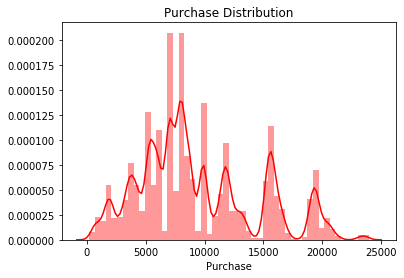

In [9]:
sns.distplot(data["Purchase"],color='r')
plt.title("Purchase Distribution")
plt.show()

We can observe that purchase amount is repeating for many customers.This may be because on Black Friday many are buying discounted products in large numbers.

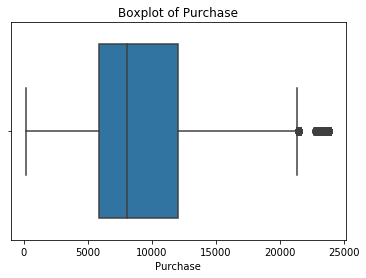

In [10]:
sns.boxplot(data["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()

In [11]:
data["Purchase"].skew()

0.6242797316083074

In [67]:
data["Purchase"].kurtosis()

-0.34312137256836284

In [33]:
data["Purchase"].describe()

count    537577.000000
mean       9333.859853
std        4981.022133
min         185.000000
25%        5866.000000
50%        8062.000000
75%       12073.000000
max       23961.000000
Name: Purchase, dtype: float64

The purchase is right skewed and we can observe multiple peaks in the distribution we can do a log transformation for the purchase.

In [106]:
purchase_log = data["Purchase"].apply(np.sqrt)

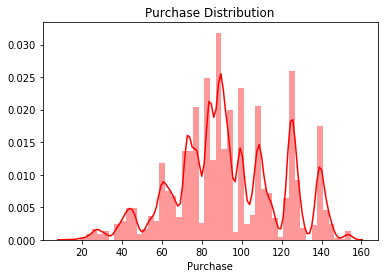

In [109]:
sns.distplot(purchase_log,color='r')
plt.title("Purchase Distribution")
plt.show()

In [110]:
purchase_log.skew()

-0.015724896111814678

### Gender

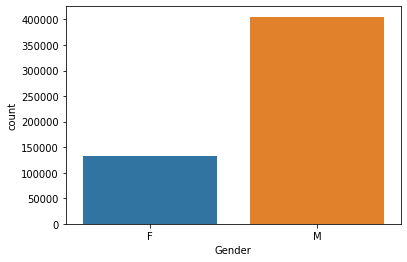

In [14]:
sns.countplot(data['Gender'])
plt.show()

In [56]:
data['Gender'].value_counts(normalize=True)*100

M    75.408732
F    24.591268
Name: Gender, dtype: float64

There are more males than females

In [60]:
data.groupby("Gender").mean()["Purchase"]

Gender
F    8809.761349
M    9504.771713
Name: Purchase, dtype: float64

As we can see average purchase of males is higher than females.

### Marital Status

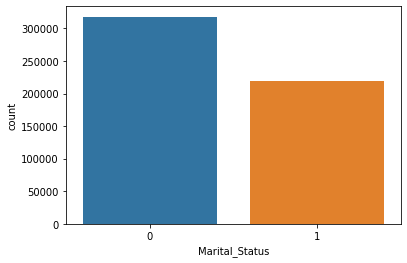

In [61]:
sns.countplot(data['Marital_Status'])
plt.show()

There are more unmarried people in the dataset.

In [65]:
data.groupby("Marital_Status").mean()["Purchase"]

Marital_Status
0    9333.325467
1    9334.632681
Name: Purchase, dtype: float64

Average purchase of married and unmarried people are the same.

### Occupation

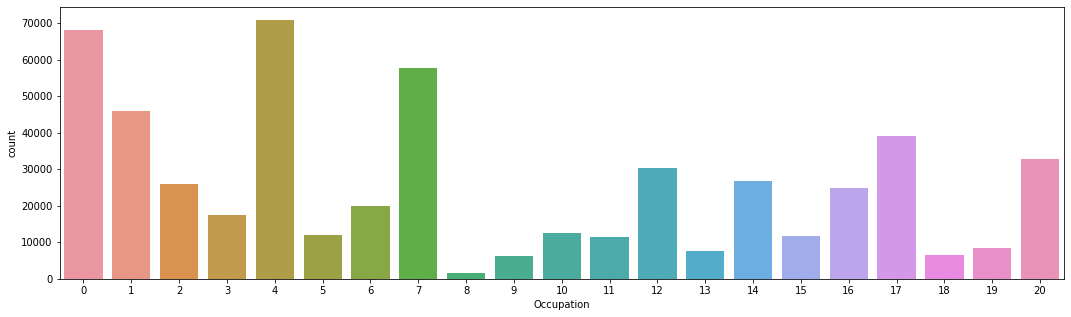

In [28]:
plt.figure(figsize=(18,5))
sns.countplot(data['Occupation'])
plt.show()

In [74]:
occup = pd.DataFrame(data.groupby("Occupation").mean()["Purchase"])
occup

,Purchase
Occupation,
0,9186.946726
1,9017.703095
2,9025.938982
3,9238.077277
4,9279.026742
5,9388.848978
6,9336.378620
7,9502.175276
8,9576.508530


Mean values are nearer to each other.

### City_Category

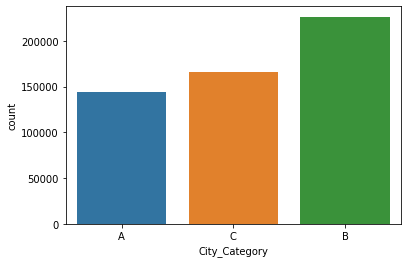

In [25]:
sns.countplot(data['City_Category'])
plt.show()

In [75]:
data.groupby("City_Category").mean()["Purchase"]

City_Category
A    8958.011014
B    9198.657848
C    9844.441855
Name: Purchase, dtype: float64

We can see that people in City_category C purchase more than the others.

### Stay_In_Current_City_Years

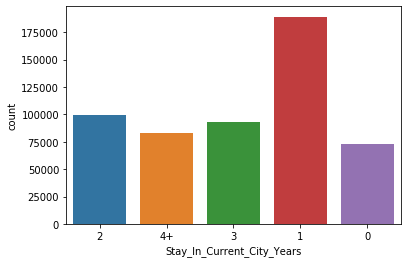

In [32]:
sns.countplot(data['Stay_In_Current_City_Years'])
plt.show()

1 is the maximum year ppl stay in current city

In [77]:
data.groupby("Stay_In_Current_City_Years").mean()["Purchase"]

Stay_In_Current_City_Years
0     9247.238625
1     9319.865095
2     9397.607316
3     9350.685121
4+    9346.370158
Name: Purchase, dtype: float64

### Age

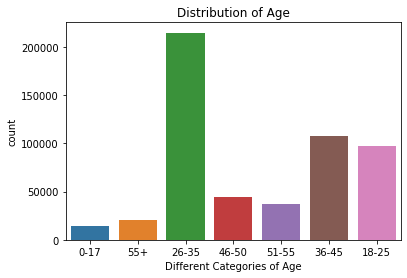

In [53]:
sns.countplot(data['Age'])
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()

Age 26-35 Age group makes the most no of purchases in the age group.

In [108]:
data.groupby("Age").mean()["Purchase"]

Age
0-17     9020.126878
18-25    9235.197575
26-35    9314.588970
36-45    9401.478758
46-50    9284.872277
51-55    9620.616620
55+      9453.898579
Name: Purchase, dtype: float64

Mean puchase rate between the age groups are the same

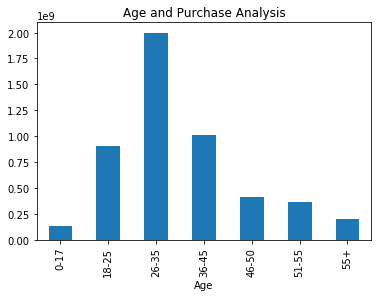

In [115]:
data.groupby("Age").sum()['Purchase'].plot(kind="bar")
plt.title("Age and Purchase Analysis")
plt.show()

### Product_Category_1

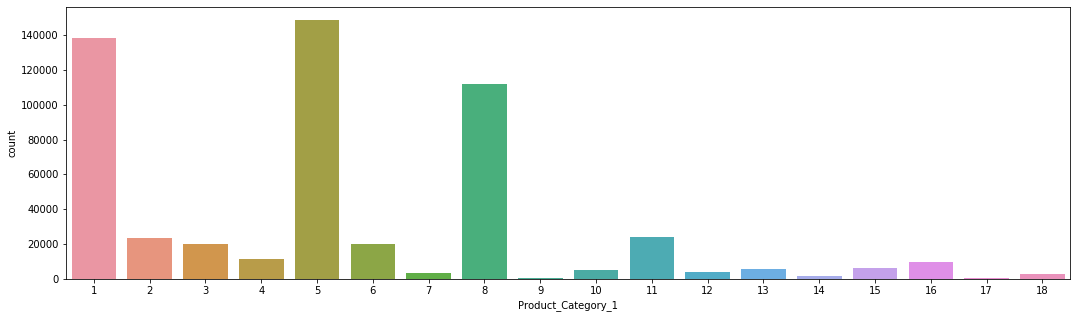

In [57]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_1'])
plt.show()

### Product_Category_2

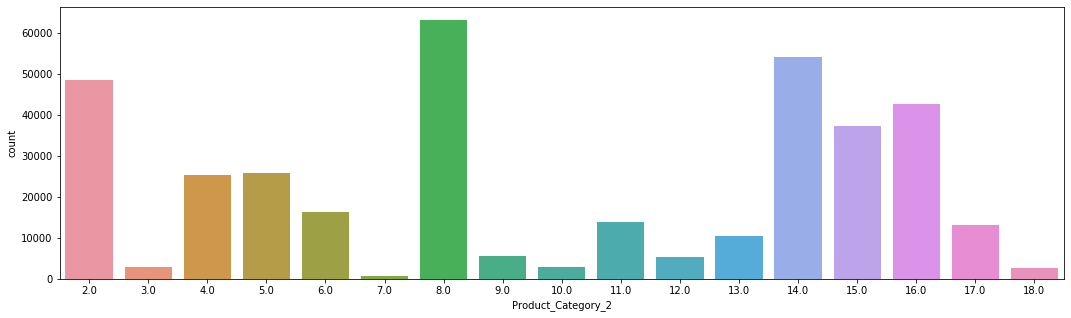

In [58]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_2'])
plt.show()

### Product_Category_3

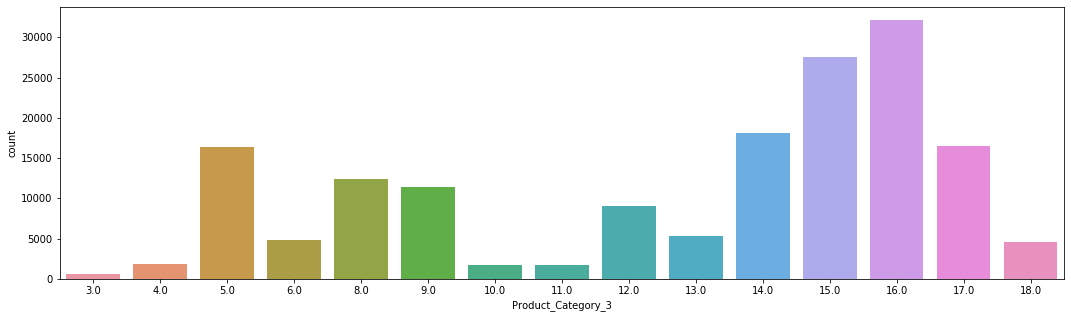

In [59]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_3'])
plt.show()

In [85]:
p1_sum = data['Product_Category_1'].sum()
p2_sum = data['Product_Category_2'].sum()
p3_sum = data['Product_Category_3'].sum()

In [98]:
labels=["Product_Ctg1_sum","Product_Cgy2_sum","Product_Ctg3_sum"]
values=[p1_sum,p2_sum,p3_sum]

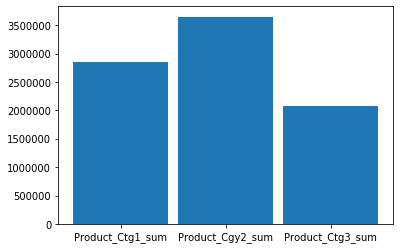

In [99]:
plt.bar(labels,values,width=0.9)
plt.show()

We can see that product_category_2 are purchased more than the other two categories.

In [20]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [101]:
data.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023024,0.018732,0.003687,0.001471,0.004045,0.005389
Occupation,-0.023024,1.000000,0.024691,-0.008114,-0.000031,0.013452,0.021104
Marital_Status,0.018732,0.024691,1.000000,0.020546,0.015116,0.019452,0.000129
Product_Category_1,0.003687,-0.008114,0.020546,1.000000,0.540423,0.229490,-0.314125
Product_Category_2,0.001471,-0.000031,0.015116,0.540423,1.000000,0.543544,-0.209973
Product_Category_3,0.004045,0.013452,0.019452,0.229490,0.543544,1.000000,-0.022257
Purchase,0.005389,0.021104,0.000129,-0.314125,-0.209973,-0.022257,1.000000


## HeatMap

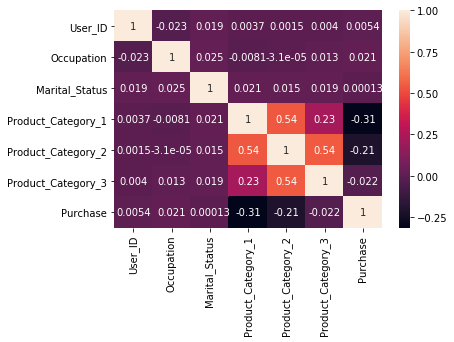

In [40]:
sns.heatmap(data.corr(),annot=True)
plt.show()

There is a serious multicollinearity between mthe product category groups.

## Pairplot

C:\Users\Nantha\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Nantha\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


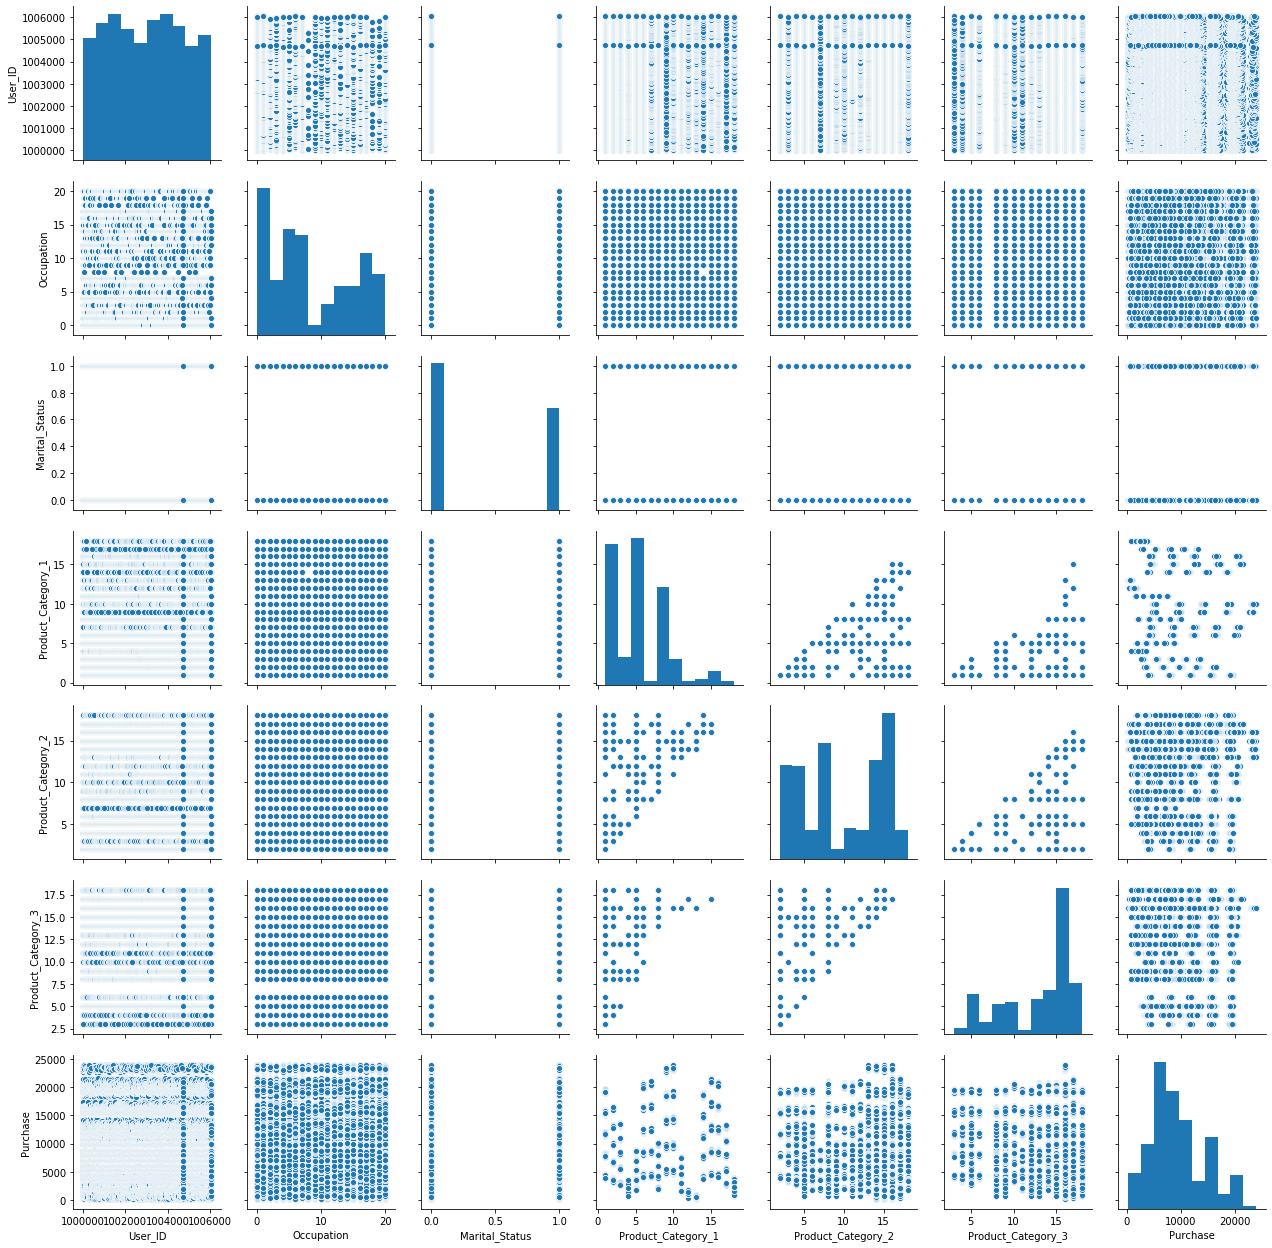

In [104]:
sns.pairplot(data)

In [111]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
# Outlier =  purchase? z-score/IQR 
# Data Transformation? sqrt/exponential
# Encoding
# Drop unrelated columns
# Base model = statistics model? ML

# Assumptions!!! 
# multicollinearity

In [117]:
test.shape

(233599, 11)

In [119]:
data.shape

(537577, 13)

we will combine test and train for data preprocessing and later split it before modeling.

In [118]:
data['src']='Train'
test['src']='Test'

In [121]:
df = pd.concat([data,test],axis=0)

C:\Users\Nantha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [122]:
df.shape

(771176, 13)

In [123]:
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID,src
0,0-17,A,F,0,10,3,NaN,NaN,P00069042,8370.0,2,1000001,Train
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001,Train
2,0-17,A,F,0,10,12,NaN,NaN,P00087842,1422.0,2,1000001,Train
3,0-17,A,F,0,10,12,14.0,NaN,P00085442,1057.0,2,1000001,Train
4,55+,C,M,0,16,8,NaN,NaN,P00285442,7969.0,4+,1000002,Train


In [126]:
df_enc = df.copy()

## Encoding the categorical variables

In [146]:
df_enc.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID,src
0,0,0,0,0,10,3,NaN,NaN,P00069042,8370.0,2,1000001,Train
1,0,0,0,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001,Train
2,0,0,0,0,10,12,NaN,NaN,P00087842,1422.0,2,1000001,Train
3,0,0,0,0,10,12,14.0,NaN,P00085442,1057.0,2,1000001,Train
4,6,2,1,0,16,8,NaN,NaN,P00285442,7969.0,4,1000002,Train


In [125]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [130]:
df_enc['Gender'] = lr.fit_transform(df_enc['Gender'])

In [133]:
df_enc['Age'] = lr.fit_transform(df_enc['Age'])

In [140]:
df_enc['Stay_In_Current_City_Years'] = df_enc['Stay_In_Current_City_Years'].replace(to_replace="4+",value="4")

In [143]:
df_enc['City_Category'] = lr.fit_transform(df_enc['City_Category'])

In [144]:
df_enc.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID,src
0,0,0,0,0,10,3,NaN,NaN,P00069042,8370.0,2,1000001,Train
1,0,0,0,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001,Train
2,0,0,0,0,10,12,NaN,NaN,P00087842,1422.0,2,1000001,Train
3,0,0,0,0,10,12,14.0,NaN,P00085442,1057.0,2,1000001,Train
4,6,2,1,0,16,8,NaN,NaN,P00285442,7969.0,4,1000002,Train


## Splitting back to original Test and Train datasets

In [186]:
train_df = df_enc[df_enc['src']=="Train"]
test_df = df_enc[df_enc['src']=="Train"]

In [178]:
train_df.shape,test_df.shape

((537577, 13), (537577, 13))

In [187]:
train_df['Product_Category_2'] =train_df['Product_Category_2'].fillna(0).astype('int64')
train_df['Product_Category_3'] =train_df['Product_Category_3'].fillna(0).astype('int64')

C:\Users\Nantha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Nantha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [188]:
test_df['Product_Category_2'] =test_df['Product_Category_2'].fillna(0).astype('int64')
test_df['Product_Category_3'] =test_df['Product_Category_3'].fillna(0).astype('int64')

C:\Users\Nantha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Nantha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [189]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537577 entries, 0 to 537576
Data columns (total 13 columns):
Age                           537577 non-null int64
City_Category                 537577 non-null int32
Gender                        537577 non-null int32
Marital_Status                537577 non-null int64
Occupation                    537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null int64
Product_Category_3            537577 non-null int64
Product_ID                    537577 non-null object
Purchase                      537577 non-null float64
Stay_In_Current_City_Years    537577 non-null object
User_ID                       537577 non-null int64
src                           537577 non-null object
dtypes: float64(1), int32(2), int64(7), object(3)
memory usage: 53.3+ MB


In [190]:
train_df.isnull().sum()

Age                           0
City_Category                 0
Gender                        0
Marital_Status                0
Occupation                    0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Product_ID                    0
Purchase                      0
Stay_In_Current_City_Years    0
User_ID                       0
src                           0
dtype: int64

In [191]:
train_df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID,src
0,0,0,0,0,10,3,0,0,P00069042,8370.0,2,1000001,Train
1,0,0,0,0,10,1,6,14,P00248942,15200.0,2,1000001,Train
2,0,0,0,0,10,12,0,0,P00087842,1422.0,2,1000001,Train
3,0,0,0,0,10,12,14,0,P00085442,1057.0,2,1000001,Train
4,6,2,1,0,16,8,0,0,P00285442,7969.0,4,1000002,Train


In [192]:
train_df = train_df.drop("src",axis=1)
test_df = test_df.drop("src",axis=1)

In [193]:
train = train_df.copy()

In [194]:
train = train.drop(["User_ID","Product_ID"],axis=1)

In [198]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537577 entries, 0 to 537576
Data columns (total 10 columns):
Age                           537577 non-null int64
City_Category                 537577 non-null int32
Gender                        537577 non-null int32
Marital_Status                537577 non-null int64
Occupation                    537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null int64
Product_Category_3            537577 non-null int64
Purchase                      537577 non-null float64
Stay_In_Current_City_Years    537577 non-null object
dtypes: float64(1), int32(2), int64(6), object(1)
memory usage: 41.0+ MB


## Splitting data into independent and dependent variables

In [195]:
X = train.drop("Purchase",axis=1)

In [196]:
y=train['Purchase']

In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modeling

### Linear Regression

In [200]:
from sklearn.linear_model import LinearRegression

In [202]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [203]:
lr.intercept_

9380.678044827799

In [204]:
lr.coef_

array([ 107.68199624,  337.62139539,  481.37996283,  -63.14096404,
          5.09742513, -317.0159013 ,    7.92604266,  148.13116355,
          6.75434226])

In [205]:
predicted_ytrain = lr.predict(X_test)

In [209]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [207]:
mean_absolute_error(y_test, predicted_ytrain)

3540.3832877502755

In [217]:
mean_squared_error(y_test, predicted_ytrain)

21342953.342497844

In [216]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, predicted_ytrain)))

RMSE of Linear Regression Model is  4619.843432682307


In [218]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [219]:
X_test

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Stay_In_Current_City_Years
93781,2,0,1,0,5,8,0,0,1
33545,1,2,1,1,4,1,5,8,3
376336,2,0,1,0,4,8,14,0,2
343466,2,1,1,0,12,2,16,0,1
346516,2,0,0,0,3,6,10,13,3
...,...,...,...,...,...,...,...,...,...
178296,1,2,0,0,3,1,15,0,0
502955,2,2,1,0,15,5,8,0,1
152830,2,1,1,1,11,5,0,0,2
207278,3,0,1,0,17,1,15,0,1


In [221]:
test = test_df.copy()

In [222]:
test = test.drop(["User_ID","Product_ID"],axis=1)

In [224]:
test_y = test['Purchase']

In [226]:
test = test.drop('Purchase',axis=1)

In [227]:
test.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Stay_In_Current_City_Years
0,0,0,0,0,10,3,0,0,2
1,0,0,0,0,10,1,6,14,2
2,0,0,0,0,10,12,0,0,2
3,0,0,0,0,10,12,14,0,2
4,6,2,1,0,16,8,0,0,4


In [228]:
predicted_y = lr.predict(test)

In [229]:
mean_absolute_error(test_y, predicted_y)

3546.6270797017974

In [230]:
mean_squared_error(test_y, predicted_y)

21452948.957452733

In [231]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(test_y, predicted_y)))

RMSE of Linear Regression Model is  4631.732824489419
